In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [43]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df.drop(['Cabin'], axis=1, inplace=True)

In [47]:
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_688\2005812820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)


In [48]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_688\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [49]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
df.drop(['Name'], axis=1, inplace=True)

df.drop(['Ticket'], axis=1, inplace=True)

df.drop(['PassengerId'], axis=1, inplace=True)

df.drop(['Embarked'], axis=1, inplace=True)

df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)

<Axes: >

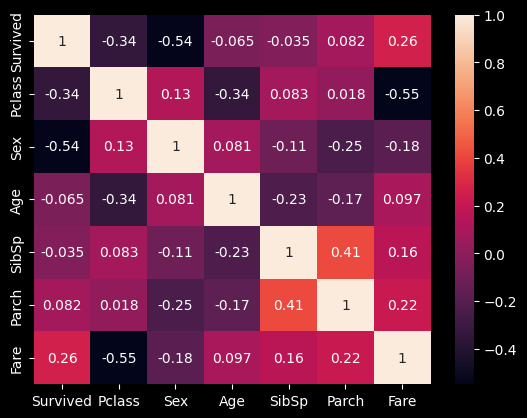

In [51]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, 
        annot=True)

In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [53]:
df.drop(['Fare'], axis=1, inplace=True)
df.drop(['SibSp'], axis=1, inplace=True)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,Parch
0,0,3,1,22.0,0
1,1,1,0,38.0,0
2,1,3,0,26.0,0
3,1,1,0,35.0,0
4,0,3,1,35.0,0


In [55]:
y_vals = df['Survived'].copy()
# df.drop(['Survived'], axis=1, inplace=True)

In [56]:
for name in ['Pclass', 'Sex', 'Age', 'Parch']:
    df[[name]] = (df[[name]] - df[[name]].min()) / (df[[name]].max() - df[[name]].min())

In [57]:
df.head()

,Survived,Pclass,Sex,Age,Parch
0,0,1.0,1.0,0.271174,0.0
1,1,0.0,0.0,0.472229,0.0
2,1,1.0,0.0,0.321438,0.0
3,1,0.0,0.0,0.434531,0.0
4,0,1.0,1.0,0.434531,0.0


In [58]:
train_df, test_df = train_test_split(df, test_size=0.3, train_size=0.7, random_state=42)

In [59]:
train_df.describe()

,Survived,Pclass,Sex,Age,Parch
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.370787,0.670947,0.658106,0.359215,0.064473
std,0.483404,0.409972,0.474725,0.163816,0.134615
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.271174,0.000000
50%,0.000000,1.000000,1.000000,0.346569,0.000000
75%,1.000000,1.000000,1.000000,0.434531,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
test_df.describe()

,Survived,Pclass,Sex,Age,Parch
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.414179,0.615672,0.623134,0.374058,0.061567
std,0.493501,0.434531,0.485507,0.162946,0.133936
min,0.000000,0.000000,0.000000,0.005152,0.000000
25%,0.000000,0.000000,0.000000,0.280598,0.000000
50%,0.000000,1.000000,1.000000,0.346569,0.000000
75%,1.000000,1.000000,1.000000,0.447097,0.000000
max,1.000000,1.000000,1.000000,0.886906,0.833333


# Линейная регрессия

In [61]:
lm = sm.OLS.from_formula('Survived ~ Pclass + Sex + Age + Parch', train_df.sort_index())
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     87.24
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           9.44e-59
Time:                        16:52:05   Log-Likelihood:                -291.19
No. Observations:                 623   AIC:                             592.4
Df Residuals:                     618   BIC:                             614.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0878      0.058     18.666      0.000       0.973       1.202
Pclass        -0.3404      0.041     -8.362      0.000      -0.420      -0.260
Sex           -0.5110      0.034    -14.856      0.000      -0.579      -0.443
Age           -0.3813      0.102     -3.720      0.000      -0.583      -0.180
Parch         -0.2393      0.121     -1.976      0.049      -0.477      -0.002
==============================================================================
Omnibus:                       29.789   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.107
Skew:                           0.564   Prob(JB):                     6.47e-08
Kurtosis:                       3.058   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
res_df = pd.DataFrame(result.predict(test_df.drop(['Survived'], axis=1)))

mse = mean_squared_error(test_df.Survived, res_df)
r2 = r2_score(test_df.Survived, res_df)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}\n')

Mean Squared Error: 0.13634032659651768
R^2 Score: 0.43808414428941955



In [63]:
test_df.head(10)

,Survived,Pclass,Sex,Age,Parch
709,1,1.0,1.0,0.346569,0.166667
439,0,0.5,1.0,0.384267,0.000000
840,0,1.0,1.0,0.246042,0.000000
720,1,0.5,0.0,0.070118,0.166667
39,1,1.0,0.0,0.170646,0.000000
290,1,0.0,0.0,0.321438,0.000000
300,1,1.0,0.0,0.346569,0.000000
333,0,1.0,1.0,0.195778,0.000000
208,1,1.0,0.0,0.195778,0.000000
136,1,0.0,0.0,0.233476,0.333333


In [64]:
result.predict(test_df.head(10))

709    0.064464
439    0.260150
840    0.142673
720    0.851004
39     0.682380
290    0.965244
300    0.615307
333    0.161837
208    0.672798
136    0.919019
dtype: float64

# Логистическая регрессия

In [65]:
logit_model = LogisticRegression()
logit_model.fit(train_df.drop(['Survived'], axis=1), train_df.Survived)

LogisticRegression()

In [66]:
res_df = pd.DataFrame(logit_model.predict(test_df.drop(['Survived'], axis=1)))

mse = mean_squared_error(test_df.Survived, res_df)
r2 = r2_score(test_df.Survived, res_df)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.19776119402985073
R^2 Score: 0.18494290468812757


In [67]:
# Вычисление метрик
accuracy = accuracy_score(test_df['Survived'], res_df)
precision = precision_score(test_df['Survived'], res_df)
recall = recall_score(test_df['Survived'], res_df)
f1 = f1_score(test_df['Survived'], res_df)
conf_matrix = confusion_matrix(test_df['Survived'], res_df)

# Вывод метрик
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.8022388059701493
Precision: 0.8020833333333334
Recall: 0.6936936936936937
F1 Score: 0.7439613526570048
Confusion Matrix:
 [[138  19]
 [ 34  77]]


1. Accuracy (Точность): доля правильных предсказаний (как верные положительные, так и верные отрицательные) от общего числа предсказаний.
2. Precision (Точность): доля истинных положительных предсказаний от всех положительных предсказаний модели. Это важно, если вы хотите минимизировать количество ложноположительных результатов.
3. Recall (Полнота): доля истинных положительных случаев, которые были правильно предсказаны. Это важно, если вы хотите минимизировать количество ложноотрицательных результатов.
4. F1 Score: гармоническое среднее между точностью и полнотой, полезно, когда необходимо учитывать как ложноположительные, так и ложноотрицательные результаты.
5. Confusion Matrix (Матрица ошибок): таблица, показывающая количество истинных положительных, ложных положительных, истинных отрицательных и ложных отрицательных предсказаний.

In [68]:
test_df.head(10)

,Survived,Pclass,Sex,Age,Parch
709,1,1.0,1.0,0.346569,0.166667
439,0,0.5,1.0,0.384267,0.000000
840,0,1.0,1.0,0.246042,0.000000
720,1,0.5,0.0,0.070118,0.166667
39,1,1.0,0.0,0.170646,0.000000
290,1,0.0,0.0,0.321438,0.000000
300,1,1.0,0.0,0.346569,0.000000
333,0,1.0,1.0,0.195778,0.000000
208,1,1.0,0.0,0.195778,0.000000
136,1,0.0,0.0,0.233476,0.333333


In [69]:
pd.DataFrame(logit_model.predict(test_df.drop(['Survived'], axis=1).head(10)))

,0
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,0
8,1
9,1


# Регрессия Лассо

In [70]:
alpha_value = 0.001
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(train_df.drop(['Survived'], axis=1), train_df.Survived)

Lasso(alpha=0.001)

In [71]:
res_df = pd.DataFrame(lasso_model.predict(test_df.drop(['Survived'], axis=1)))

mse = mean_squared_error(test_df.Survived, res_df)
r2 = r2_score(test_df.Survived, res_df)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}\n')

Mean Squared Error: 0.13687579595108537
R^2 Score: 0.43587724976239417



In [72]:
res_df.head(10)

,0
0,0.077247
1,0.257246
2,0.137852
3,0.835924
4,0.666579
5,0.946314
6,0.609253
7,0.154231
8,0.658390
9,0.919281


In [73]:
test_df.Survived.head(10)

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64